# Cleaning Rent Burden Census Block Groups in Alameda County & Spatial Analysis

In this notebook, I will clean the census block group data so that I can use it for my spatial analysis of rent burden changes in Alameda County. Cleaning the data takes up a lot of memory, so I expect to start another notebook for the actual analysis.

Some key things to note before I begin, the census website did not have rent burden block group data from 2011. Our other analyses have compared census tracts from 2011 to 2019. However, since there is a lack of data for block groups, 2013 is the closests year and will still provide worthwhile analyses.

I'll start by importing my libraries and then input and clean my 2019 rent burden data.

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx
 
# to give more power to your figures (plots)
import matplotlib.pyplot as plt


/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## 2019 Rent Burden Data

In [2]:
rb2019 = gpd.read_file('2019RB.csv')

I want to get a look at the data and see what I'm working with. I know there will be a row I need to get rid of, but it could be at the top or at the bottom.

In [3]:
rb2019.head()

,B25070_001E,B25070_001M,B25070_002E,B25070_002M,B25070_003E,B25070_003M,B25070_004E,B25070_004M,B25070_005E,B25070_005M,...,B25070_008M,B25070_009E,B25070_009M,B25070_010E,B25070_010M,B25070_011E,B25070_011M,GEO_ID,NAME,geometry
0,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!Less than 10.0 percent,Margin of Error!!Total:!!Less than 10.0 percent,Estimate!!Total:!!10.0 to 14.9 percent,Margin of Error!!Total:!!10.0 to 14.9 percent,Estimate!!Total:!!15.0 to 19.9 percent,Margin of Error!!Total:!!15.0 to 19.9 percent,Estimate!!Total:!!20.0 to 24.9 percent,Margin of Error!!Total:!!20.0 to 24.9 percent,...,Margin of Error!!Total:!!35.0 to 39.9 percent,Estimate!!Total:!!40.0 to 49.9 percent,Margin of Error!!Total:!!40.0 to 49.9 percent,Estimate!!Total:!!50.0 percent or more,Margin of Error!!Total:!!50.0 percent or more,Estimate!!Total:!!Not computed,Margin of Error!!Total:!!Not computed,id,Geographic Area Name,None
1,143,65,42,35,0,12,10,15,41,47,...,15,9,13,25,19,7,11,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,114,34,13,14,19,16,27,18,19,14,...,8,0,12,21,17,0,12,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,208,43,21,19,46,23,51,27,18,16,...,12,8,11,0,12,0,12,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None
4,141,63,9,15,29,32,30,34,46,41,...,19,0,12,0,12,0,12,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",None


In [4]:
rb2019.tail()

,B25070_001E,B25070_001M,B25070_002E,B25070_002M,B25070_003E,B25070_003M,B25070_004E,B25070_004M,B25070_005E,B25070_005M,...,B25070_008M,B25070_009E,B25070_009M,B25070_010E,B25070_010M,B25070_011E,B25070_011M,GEO_ID,NAME,geometry
1044,27,14,4,6,4,6,8,12,4,5,...,12,0,12,0,12,0,12,1500000US060019819001,"Block Group 1, Census Tract 9819, Alameda Coun...",None
1045,0,12,0,12,0,12,0,12,0,12,...,12,0,12,0,12,0,12,1500000US060019820001,"Block Group 1, Census Tract 9820, Alameda Coun...",None
1046,51,29,0,12,0,12,19,23,10,10,...,12,5,7,0,12,0,12,1500000US060019832001,"Block Group 1, Census Tract 9832, Alameda Coun...",None
1047,0,12,0,12,0,12,0,12,0,12,...,12,0,12,0,12,0,12,1500000US060019900000,"Block Group 0, Census Tract 9900, Alameda Coun...",None
1048,268286,2245,8948,700,21773,960,32074,1181,35669,1166,...,701,23644,1163,63047,1575,10963,819,0500000US06001,"Alameda County, California",None


It was at the bottom! So I'll drop that row and move on with cleaning up the dataset to only have the necessary columns. The dataset comes with margin of error columns, which won't be too useful for our analyses.

In [5]:
rb2019= rb2019.drop([1048])

In [6]:
rb2019.tail()

,B25070_001E,B25070_001M,B25070_002E,B25070_002M,B25070_003E,B25070_003M,B25070_004E,B25070_004M,B25070_005E,B25070_005M,...,B25070_008M,B25070_009E,B25070_009M,B25070_010E,B25070_010M,B25070_011E,B25070_011M,GEO_ID,NAME,geometry
1043,206,61,0,12,9,16,43,49,23,22,...,21,11,17,54,36,0,12,1500000US060014517043,"Block Group 3, Census Tract 4517.04, Alameda C...",None
1044,27,14,4,6,4,6,8,12,4,5,...,12,0,12,0,12,0,12,1500000US060019819001,"Block Group 1, Census Tract 9819, Alameda Coun...",None
1045,0,12,0,12,0,12,0,12,0,12,...,12,0,12,0,12,0,12,1500000US060019820001,"Block Group 1, Census Tract 9820, Alameda Coun...",None
1046,51,29,0,12,0,12,19,23,10,10,...,12,5,7,0,12,0,12,1500000US060019832001,"Block Group 1, Census Tract 9832, Alameda Coun...",None
1047,0,12,0,12,0,12,0,12,0,12,...,12,0,12,0,12,0,12,1500000US060019900000,"Block Group 0, Census Tract 9900, Alameda Coun...",None


In [7]:
list(rb2019)

['B25070_001E',
 'B25070_001M',
 'B25070_002E',
 'B25070_002M',
 'B25070_003E',
 'B25070_003M',
 'B25070_004E',
 'B25070_004M',
 'B25070_005E',
 'B25070_005M',
 'B25070_006E',
 'B25070_006M',
 'B25070_007E',
 'B25070_007M',
 'B25070_008E',
 'B25070_008M',
 'B25070_009E',
 'B25070_009M',
 'B25070_010E',
 'B25070_010M',
 'B25070_011E',
 'B25070_011M',
 'GEO_ID',
 'NAME',
 'geometry']

In [8]:
columns_to_keep =  ['B25070_001E',
                    'B25070_002E',
                    'B25070_003E',
                    'B25070_004E',
                    'B25070_005E',
                    'B25070_006E',
                    'B25070_007E',
                    'B25070_008E',
                    'B25070_009E',
                    'B25070_010E',
                    'B25070_011E',
                    'GEO_ID',
                    'NAME',
                    'geometry']

In [9]:
rb2019 = rb2019[columns_to_keep]

In [10]:
rb2019.head()

,B25070_001E,B25070_002E,B25070_003E,B25070_004E,B25070_005E,B25070_006E,B25070_007E,B25070_008E,B25070_009E,B25070_010E,B25070_011E,GEO_ID,NAME,geometry
0,Estimate!!Total:,Estimate!!Total:!!Less than 10.0 percent,Estimate!!Total:!!10.0 to 14.9 percent,Estimate!!Total:!!15.0 to 19.9 percent,Estimate!!Total:!!20.0 to 24.9 percent,Estimate!!Total:!!25.0 to 29.9 percent,Estimate!!Total:!!30.0 to 34.9 percent,Estimate!!Total:!!35.0 to 39.9 percent,Estimate!!Total:!!40.0 to 49.9 percent,Estimate!!Total:!!50.0 percent or more,Estimate!!Total:!!Not computed,id,Geographic Area Name,None
1,143,42,0,10,41,0,0,9,9,25,7,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,114,13,19,27,19,6,3,6,0,21,0,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,208,21,46,51,18,40,13,11,8,0,0,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None
4,141,9,29,30,46,0,15,12,0,0,0,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",None


I was able to just copy and paste and cut out the M columns. However I see that there is another row I need to drop, row 0, since I will rename the columns myself.

In [11]:
rb2019 = rb2019.drop([0])

In [12]:
rb2019.columns.to_list()

['B25070_001E',
 'B25070_002E',
 'B25070_003E',
 'B25070_004E',
 'B25070_005E',
 'B25070_006E',
 'B25070_007E',
 'B25070_008E',
 'B25070_009E',
 'B25070_010E',
 'B25070_011E',
 'GEO_ID',
 'NAME',
 'geometry']

In [13]:
rb2019.columns = ['Total',
                  '<10% 2019',
                  '10-14.9% 2019',
                  '15-19.9% 2019',
                  '20-24.9% 2019',
                  '25-29.9% 2019',
                  '30-34.9% 2019',
                  '35-39.9% 2019',
                  '40-49.9% 2019',
                  '>50% 2019',
                  'Not Computed 2019',
                  'GEO_ID',
                  'Name',
                 'geometry']

Here I renamed the columns to actually useful names! I see that the GEO_ID is huge, and we only want the FIPS code, so I will replace the '1500000US' with '' (an empty space) so that it essentially is replaced with nothing. 

In [14]:
rb2019.head()

,Total,<10% 2019,10-14.9% 2019,15-19.9% 2019,20-24.9% 2019,25-29.9% 2019,30-34.9% 2019,35-39.9% 2019,40-49.9% 2019,>50% 2019,Not Computed 2019,GEO_ID,Name,geometry
1,143,42,0,10,41,0,0,9,9,25,7,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,114,13,19,27,19,6,3,6,0,21,0,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,208,21,46,51,18,40,13,11,8,0,0,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None
4,141,9,29,30,46,0,15,12,0,0,0,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",None
5,490,31,93,95,16,78,61,41,0,62,13,1500000US060014003002,"Block Group 2, Census Tract 4003, Alameda Coun...",None


In [15]:
rb2019['GEO_ID'] = rb2019['GEO_ID'].str.replace('1500000US','')
rb2019.head()

,Total,<10% 2019,10-14.9% 2019,15-19.9% 2019,20-24.9% 2019,25-29.9% 2019,30-34.9% 2019,35-39.9% 2019,40-49.9% 2019,>50% 2019,Not Computed 2019,GEO_ID,Name,geometry
1,143,42,0,10,41,0,0,9,9,25,7,060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,114,13,19,27,19,6,3,6,0,21,0,060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,208,21,46,51,18,40,13,11,8,0,0,060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None
4,141,9,29,30,46,0,15,12,0,0,0,060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",None
5,490,31,93,95,16,78,61,41,0,62,13,060014003002,"Block Group 2, Census Tract 4003, Alameda Coun...",None


In [16]:
rb2019= rb2019[['Total',
                  '<10% 2019',
                  '10-14.9% 2019',
                  '15-19.9% 2019',
                  '20-24.9% 2019',
                  '25-29.9% 2019',
                  '30-34.9% 2019',
                  '35-39.9% 2019',
                  '40-49.9% 2019',
                  '>50% 2019',
                  'GEO_ID',
                  'Name']]

Here I got rid of the geometry and not computed columns.

In [17]:
rb2019.head()

,Total,<10% 2019,10-14.9% 2019,15-19.9% 2019,20-24.9% 2019,25-29.9% 2019,30-34.9% 2019,35-39.9% 2019,40-49.9% 2019,>50% 2019,GEO_ID,Name
1,143,42,0,10,41,0,0,9,9,25,060014001001,"Block Group 1, Census Tract 4001, Alameda Coun..."
2,114,13,19,27,19,6,3,6,0,21,060014002001,"Block Group 1, Census Tract 4002, Alameda Coun..."
3,208,21,46,51,18,40,13,11,8,0,060014002002,"Block Group 2, Census Tract 4002, Alameda Coun..."
4,141,9,29,30,46,0,15,12,0,0,060014003001,"Block Group 1, Census Tract 4003, Alameda Coun..."
5,490,31,93,95,16,78,61,41,0,62,060014003002,"Block Group 2, Census Tract 4003, Alameda Coun..."


Now I'm going to join the pandas file with the block group shapefile to turn my dataset into a geodataframe. This will add the correct geometry information for each block group.

In [18]:
blockshape = gpd.read_file('tl_2013_06_bg.shp')

In [19]:
blockshape.shape

(23212, 13)

In [20]:
blockshape.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,025,940000,3,060259400003,Block Group 3,G5030,S,12266442,680335,+32.7424027,-114.6675664,"POLYGON ((-114.72653 32.71824, -114.72639 32.7..."
1,06,025,010800,2,060250108002,Block Group 2,G5030,S,59331705,0,+32.7658550,-115.3923893,"POLYGON ((-115.43082 32.73090, -115.43082 32.7..."
2,06,025,010800,1,060250108001,Block Group 1,G5030,S,230656790,0,+32.8363463,-115.3514134,"POLYGON ((-115.45784 32.90895, -115.45773 32.9..."
3,06,025,011100,3,060250111003,Block Group 3,G5030,S,1209336,0,+32.7932442,-115.6903925,"POLYGON ((-115.70134 32.79085, -115.70091 32.7..."
4,06,073,010013,2,060730100132,Block Group 2,G5030,S,404606,0,+32.5564082,-117.0507980,"POLYGON ((-117.05430 32.55542, -117.05430 32.5..."


In [21]:
rb2019.columns=['Total',
                  '<10% 2019',
                  '10-14.9% 2019',
                  '15-19.9% 2019',
                  '20-24.9% 2019',
                  '25-29.9% 2019',
                  '30-34.9% 2019',
                  '35-39.9% 2019',
                  '40-49.9% 2019',
                  '>50% 2019',
                  'GEOID',
                  'Name']

Here I changed the GEO_ID name to GEOID so that it matches the shapefile. I need to do the join on GEOID, so they need to match. I'll also clean up the blockshape shapefile so that it only has the two columns I need, GEOID and geometry.

In [22]:
rb2019.shape

(1047, 12)

In [23]:
blockshape=blockshape[['GEOID', 'geometry']]

In [24]:
rb_block2019 = blockshape.merge(rb2019, on='GEOID')

In [25]:
rb_block2019.head()

,GEOID,geometry,Total,<10% 2019,10-14.9% 2019,15-19.9% 2019,20-24.9% 2019,25-29.9% 2019,30-34.9% 2019,35-39.9% 2019,40-49.9% 2019,>50% 2019,Name
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...",79,0,0,42,37,0,0,0,0,0,"Block Group 1, Census Tract 4403.35, Alameda C..."
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...",301,0,8,41,48,60,65,0,0,79,"Block Group 2, Census Tract 4423.01, Alameda C..."
2,060014060001,"POLYGON ((-122.26735 37.78872, -122.26445 37.7...",339,0,18,100,36,88,57,0,10,25,"Block Group 1, Census Tract 4060, Alameda Coun..."
3,060014337001,"POLYGON ((-122.11467 37.68870, -122.11462 37.6...",232,0,0,13,53,21,0,33,60,45,"Block Group 1, Census Tract 4337, Alameda Coun..."
4,060014364012,"POLYGON ((-122.07302 37.67305, -122.07265 37.6...",382,0,36,29,28,38,45,47,0,159,"Block Group 2, Census Tract 4364.01, Alameda C..."


In [26]:
rb_block2019.shape

(1047, 13)

Super huge dataset! But cleaner than before. Now I want to make sure my data is in the right format so that I can do some arithmetic functions to normalize the data. But first, I want to make a dataset that only has the block group, geometry, and total population. This will be important for the spatial auto correlation maps I will produce later. That way we can see which census block groups have had the most change because they will stand out on the map. I'll do this by making a copy of this newly joined dataset.

In [27]:
bg = rb_block2019.copy()

In [28]:
bg.head(3)

,GEOID,geometry,Total,<10% 2019,10-14.9% 2019,15-19.9% 2019,20-24.9% 2019,25-29.9% 2019,30-34.9% 2019,35-39.9% 2019,40-49.9% 2019,>50% 2019,Name
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...",79,0,0,42,37,0,0,0,0,0,"Block Group 1, Census Tract 4403.35, Alameda C..."
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...",301,0,8,41,48,60,65,0,0,79,"Block Group 2, Census Tract 4423.01, Alameda C..."
2,060014060001,"POLYGON ((-122.26735 37.78872, -122.26445 37.7...",339,0,18,100,36,88,57,0,10,25,"Block Group 1, Census Tract 4060, Alameda Coun..."


In [29]:
list(bg)

['GEOID',
 'geometry',
 'Total',
 '<10% 2019',
 '10-14.9% 2019',
 '15-19.9% 2019',
 '20-24.9% 2019',
 '25-29.9% 2019',
 '30-34.9% 2019',
 '35-39.9% 2019',
 '40-49.9% 2019',
 '>50% 2019',
 'Name']

In [30]:
col_keep = ['GEOID',
 'geometry',
 'Total']

In [31]:
bg = bg[col_keep]
bg.head(2)

,GEOID,geometry,Total
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...",79
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...",301


Awesome, now I'm going to save this for later use. After this, I'm going to project it to web mercator and take see what it looks like.

In [32]:
bg['Total'] = bg['Total'].astype(int)
bg.describe()

,Total
count,1047.000000
mean,256.242598
std,225.732101
min,0.000000
25%,89.000000
50%,197.000000
75%,349.000000
max,1518.000000


I wanted to see what the range in the populations were so that I can delete the block groups that have too few people. I'm going to cut it off a 50 people. 

In [33]:
bg.sort_values(by='Total').head(30)

,GEOID,geometry,Total
974,060019820001,"POLYGON ((-122.31439 37.79484, -122.31350 37.7...",0
566,060014513002,"POLYGON ((-121.80195 37.68391, -121.80195 37.6...",0
739,060014431023,"POLYGON ((-121.93466 37.50622, -121.93435 37.5...",0
542,060014272005,"POLYGON ((-122.25694 37.78573, -122.25558 37.7...",0
221,060014416011,"POLYGON ((-122.03634 37.56651, -122.03567 37.5...",0
675,060014403043,"POLYGON ((-122.08120 37.58757, -122.08097 37.5...",0
377,060014506044,"POLYGON ((-121.89485 37.67759, -121.89484 37.6...",0
226,060014506022,"POLYGON ((-121.93029 37.68880, -121.93008 37.6...",0
444,060014261006,"POLYGON ((-122.22576 37.82096, -122.22575 37.8...",0
365,060014330001,"POLYGON ((-122.14545 37.72172, -122.14534 37.7...",0


In [34]:
# delete less than 75 population geographies
bg = bg[bg['Total']>50]

In [35]:
# reprojecting to web mercator
bg = bg.to_crs(epsg=3857)

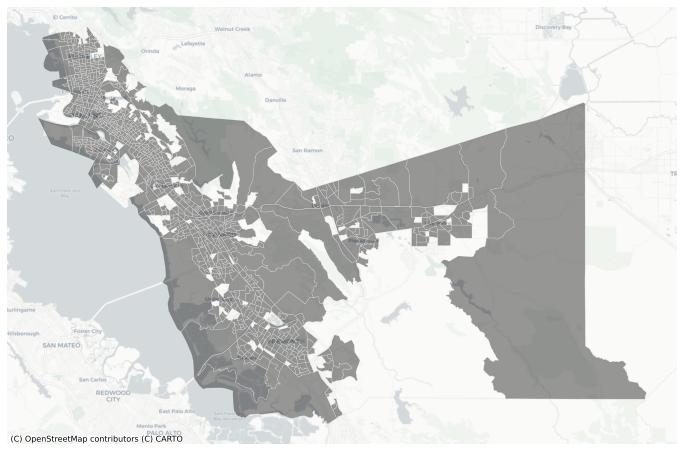

In [36]:
# plot
fig, ax = plt.subplots(figsize=(12,12))

bg.plot(ax=ax,
         color='black', 
         edgecolor='white',
         lw=0.5,
         alpha=0.4)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

That's fine for now, I'm a little worried that the populations near our transit stops might not have >50 people, which will greatly impact the validity of our analysis. I'll just save this dataset so that I can use it later.

In [ ]:
bg.to_file("Alameda_BG.geojson", driver='GeoJSON')

In [ ]:
rb_block2019.info

In [ ]:
random_tract= rb_block2019.sample(1)

In [ ]:
random_tract

In [ ]:
type(random_tract.iloc[0]['<10% 2019'])

So here I created a variable of just a random block group and I wanted to check its data type. We want floats, not strings, but looks like they are strings! So, I'll create a loop function to change them into floats (decimals)

In [ ]:
list(rb_block2019)

In [ ]:
dtypes = ['Total', 
          '<10% 2019',
          '10-14.9% 2019',
          '15-19.9% 2019',
          '20-24.9% 2019',
          '25-29.9% 2019',
          '30-34.9% 2019',
          '35-39.9% 2019',
          '40-49.9% 2019',
          '>50% 2019']

In [ ]:
for i in dtypes:
    rb_block2019[i]=rb_block2019[i].astype(float)

In [ ]:
random_tract2 = rb_block2019.sample(1)

In [ ]:
type(random_tract2.iloc[0][ '<10% 2019'])

In [ ]:
rb_block2019.info()

Great! It worked. Now I want to normalize the data. Counts are cool, but percent's give more relative information. I'll do this by creating a function that will create a percentages column in my dataset.

In [ ]:
def createpercentage(block):
    for x in dtypes:
        block[("Percent " + x)] = block[x]/block['Total']*100
        print(x, "Completed")

In [ ]:
createpercentage(rb_block2019)

In [ ]:
rb_block2019.head()

Great! Now to get rid of that count data, because the percent data is really what we're going to use. 

In [ ]:
list(rb_block2019)

In [ ]:
keep1 = ['GEOID',
         'geometry',
         'Name',
 'Percent Total',
 'Percent <10% 2019',
 'Percent 10-14.9% 2019',
 'Percent 15-19.9% 2019',
 'Percent 20-24.9% 2019',
 'Percent 25-29.9% 2019',
 'Percent 30-34.9% 2019',
 'Percent 35-39.9% 2019',
 'Percent 40-49.9% 2019',
 'Percent >50% 2019']

In [ ]:
rb2019_pct = rb_block2019[keep1]

In [ ]:
rb2019_pct.head()

Awesome. Now I want to save this just so that I can use it later without going through all that work again. The following code adds the data to my jupyterhub folder, which I can then download. I'll then make a copy so that I don't mess with this cleaned dataset when I do some other work. 

In [ ]:
rb2019_pct.to_file("RB_2019.geojson", driver='GeoJSON')

In [ ]:
cln_rb2019 = rb2019_pct.copy()

In [ ]:
cln_rb2019.head()

In [ ]:
cln_rb2019.info()

In [ ]:
sumcolumn = cln_rb2019["Percent 30-34.9% 2019"] + cln_rb2019["Percent 35-39.9% 2019"] + cln_rb2019["Percent 40-49.9% 2019"] 

I wanted to make a column for >30% because rent burden is defined as a household spending more than 30% of their income on rent. It will be helpful to have this column so that I can specifically call it out on my future maps. 

In [ ]:
cln_rb2019[">30% 2019"] = sumcolumn

In [ ]:
cln_rb2019.head()

Now I'm going to do the same thing for 2013 data. After that, I will join the tables and create a percent change column to see how things changed between the two years. 

In [ ]:
rb2013 = gpd.read_file('2013RB.csv')

In [ ]:
rb2013.head()

In [ ]:
rb2013.tail()

In [ ]:
rb2013= rb2013.drop([1048])

In [ ]:
rb2013= rb2013.drop([0])

In [ ]:
list(rb2013)

In [ ]:
columns_to_keep2= ['B25070_001E',
                   'B25070_002E',
                   'B25070_003E',
                   'B25070_004E',
                   'B25070_005E',
                   'B25070_006E',
                   'B25070_007E',
                   'B25070_008E',
                   'B25070_009E',
                   'B25070_010E',
                   'B25070_011E',
                   'GEO_ID',
                   'NAME',
                   'geometry']

In [ ]:
rb2013= rb2013[columns_to_keep2]

In [ ]:
rb2013.head()

In [ ]:
rb2013.columns = ['Total',
                  '<10% 2013',
                  '10-14.9% 2013',
                  '15-19.9% 2013',
                  '20-24.9% 2013',
                  '25-29.9% 2013',
                  '30-34.9% 2013',
                  '35-39.9% 2013',
                  '40-49.9% 2013',
                  '>50% 2013',
                  'Not Computed 2013',
                  'GEO_ID',
                  'Name',
                 'geometry']

In [ ]:
rb2013.head()

In [ ]:
rb2013['GEO_ID'] = rb2013['GEO_ID'].str.replace('1500000US','')
rb2013.head()

In [ ]:
rb2013.columns=['Total',
                  '<10% 2013',
                  '10-14.9% 2013',
                  '15-19.9% 2013',
                  '20-24.9% 2013',
                  '25-29.9% 2013',
                  '30-34.9% 2013',
                  '35-39.9% 2013',
                  '40-49.9% 2013',
                  '>50% 2013',
                  'Not Computed 2013',
                  'GEOID',
                  'Name',
                 'geometry']

In [ ]:
rb2013.head()

In [ ]:
rb2013= rb2013[['Total',
                  '<10% 2013',
                  '10-14.9% 2013',
                  '15-19.9% 2013',
                  '20-24.9% 2013',
                  '25-29.9% 2013',
                  '30-34.9% 2013',
                  '35-39.9% 2013',
                  '40-49.9% 2013',
                  '>50% 2013',
                  'GEOID',
                  'Name']]

In [ ]:
rb2013.head()

In [ ]:
random= rb2013.sample(1)
random

In [ ]:
dtypes2 = ['Total',
                  '<10% 2013',
                  '10-14.9% 2013',
                  '15-19.9% 2013',
                  '20-24.9% 2013',
                  '25-29.9% 2013',
                  '30-34.9% 2013',
                  '35-39.9% 2013',
                  '40-49.9% 2013',
                  '>50% 2013']

In [ ]:
for i in dtypes2:
    rb2013[i]=rb2013[i].astype(float)

In [ ]:
rb2013.info()

In [ ]:
rb2013['GEOID']=rb2013['GEOID'].astype(object)

In [ ]:
rb2013.info()

In [ ]:
def createpercentage2(block):
    for x in dtypes2:
        block[("Percent " + x)] = block[x]/block['Total']*100
        print(x, "Completed")

In [ ]:
createpercentage2(rb2013)

In [ ]:
rb2013.head()

In [ ]:
list(rb2013)

In [ ]:
keep3= ['GEOID',
 'Name',
 'Percent Total',
 'Percent <10% 2013',
 'Percent 10-14.9% 2013',
 'Percent 15-19.9% 2013',
 'Percent 20-24.9% 2013',
 'Percent 25-29.9% 2013',
 'Percent 30-34.9% 2013',
 'Percent 35-39.9% 2013',
 'Percent 40-49.9% 2013',
 'Percent >50% 2013']

In [ ]:
rb2013_pct = rb2013[keep3]
rb2013_pct.head()

In [ ]:
sumcolumn2 = rb2013_pct["Percent 30-34.9% 2013"] + rb2013_pct["Percent 35-39.9% 2013"] + rb2013_pct["Percent 40-49.9% 2013"]

In [ ]:
rb2013_pct['>30% 2013'] = sumcolumn2
rb2013_pct.head()

In [ ]:
rb2019.head(1)

Awesome! After all that work, now I can join the two datasets together so that I can create a percent change column. This will let me see if there were positive or negative changes in the rent burden categories within each block group. I can join the 2013 data and the 2019 data on GEOID because I didn't join the 2013 data with the blockgroup shapefile like I did the 2019 data. Saves me a headache.

In [ ]:
rb_bg_pc = cln_rb2019.merge(rb2013_pct, on='GEOID')

In [ ]:
rb_bg_pc.head()

In [ ]:
rb_bg_pc.info()

Awesome, looking good. Now I want to clean it up and cut out the columns I don't need. 

In [ ]:
list(rb_bg_pc)

In [ ]:
keep4 = ['GEOID',
         'geometry',
         'Name_x',
         'Percent <10% 2019',
         'Percent 10-14.9% 2019',
         'Percent 15-19.9% 2019',
         'Percent 20-24.9% 2019',
         'Percent 25-29.9% 2019',
         'Percent 30-34.9% 2019',
         'Percent 35-39.9% 2019',
         'Percent 40-49.9% 2019',
         'Percent >50% 2019',
         '>30% 2019',
         'Percent <10% 2013',
         'Percent 10-14.9% 2013',
         'Percent 15-19.9% 2013',
         'Percent 20-24.9% 2013',
         'Percent 25-29.9% 2013',
         'Percent 30-34.9% 2013',
         'Percent 35-39.9% 2013',
         'Percent 40-49.9% 2013',
         'Percent >50% 2013',
         '>30% 2013']

In [ ]:
rb_bg_pc = rb_bg_pc[keep4]
rb_bg_pc.head()

In [ ]:
list(rb_bg_pc)

In [ ]:
rb_bg_pc.columns = ['GEOID',
 'geometry',
 'Name',
 '<10% 2019',
 '10-14.9% 2019',
 '15-19.9% 2019',
 '20-24.9% 2019',
 '25-29.9% 2019',
 '30-34.9% 2019',
 '35-39.9% 2019',
 '40-49.9% 2019',
 '>50% 2019',
 '>30% 2019',
 '<10% 2013',
 '10-14.9% 2013',
 '15-19.9% 2013',
 '20-24.9% 2013',
 '25-29.9% 2013',
 '30-34.9% 2013',
 '35-39.9% 2013',
 '40-49.9% 2013',
 '>50% 2013',
 '>30% 2013']

In [ ]:
rb_bg_pc.head(2)

Now to save this dataset so that I can use it again later. I'm going to create a copy and work on the copy so that I don't mess with any of the hard work I just did!

In [ ]:
rb_bg_pc.to_file("RB_Pcts.geojson", driver='GeoJSON')

In [ ]:
pcnt_chng = rb_bg_pc.copy()
pcnt_chng.head()

Now I am going to make a percent change column for each rent burden category. I'll start by listing the column names, then I will change the names so that they end in _19 or _13 so that I can use a for loop to make the new columns. If the numbers aren't connected by a _ python will assume its a stand alone number. The loop will go through each column and subtract the 2019 by the 2013, and then divide by 2013. Percent change formula is new-old/old.

In [ ]:
list(pcnt_chng)

In [ ]:
pcnt_chng.columns = ['GEOID',
 'geometry',
 'Name',
 '<10%_2019',
 '10-14.9%_2019',
 '15-19.9%_2019',
 '20-24.9%_2019',
 '25-29.9%_2019',
 '30-34.9%_2019',
 '35-39.9%_2019',
 '40-49.9%_2019',
 '>50%_2019',
 '>30%_2019',
 '<10%_2013',
 '10-14.9%_2013',
 '15-19.9%_2013',
 '20-24.9%_2013',
 '25-29.9%_2013',
 '30-34.9%_2013',
 '35-39.9%_2013',
 '40-49.9%_2013',
 '>50%_2013',
 '>30%_2013']

In [ ]:
list(pcnt_chng)

In [ ]:
pcnt_chng=pcnt_chng
for i in list(pcnt_chng.columns):
    if "2019" in i:
        pcnt_chng[i.split("_")[0]+"_change"]= (((pcnt_chng[i]-pcnt_chng[i.split("_")[0]+"_2013"])/pcnt_chng[i.split("_")[0]+"_2013"]))
       

In [ ]:
pcnt_chng.info()

Great! It worked. 

In [ ]:
pcnt_chng.head()

I need to get rid of the null and infinite values. I do this with the following:

In [ ]:
import numpy as np

In [ ]:
# Replace infinite updated data with nan
pcnt_chng.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
pcnt_chng.dropna(inplace=True)
pcnt_chng.sample(15)

In [ ]:
pcnt_chng.to_file("BlockGroup_PcntChange.geojson", driver='GeoJSON')

Now I am going to save this dataset, and then create a new one with only the percent change data. Then I'll create another one that will just have <10%, >30%, and >50%. I think these groups will be the most informative/meaningful for our analysis. 

In [ ]:
newrb = pcnt_chng.copy()

In [ ]:
list(newrb)

In [ ]:
keep5 = ['GEOID',
         'geometry',
         'Name',
         '<10%_change',
         '>50%_change',
         '>30%_change']

In [ ]:
newrb= newrb[keep5]
newrb.head(2)

In [ ]:
newrb.to_file("RB_focus.geojson", driver="GeoJSON")

Great! Now I saved this one so I won't have to go though that mess again. Now I'm going to plot the block groups and see how they look. First, I'll reproject my data to webmercator. I'll need to import some more libraries first

In [ ]:
#for basemaps
import contextily as ctx

# to give more power to my figures
import matplotlib.pyplot as plt


In [ ]:
pcnt_chng = pcnt_chng.to_crs(epsg=3857)
newrb = newrb.to_crs(epsg=3857)
blockshape = blockshape.to_crs(epsg=3857)

In [ ]:
stations = gpd.read_file('Data/stations.geojson')
stations.head(10)

I need to make a lat and lon column for the stations dataset. This will allow me to plot them later.

In [ ]:
stations['lon']=stations.geometry.x
stations['lat']=stations.geometry.y

In [ ]:
stations.head()

In [ ]:
stations['Marker'].dtypes

In [ ]:
minx, miny, maxx, maxy = stations.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)


Now I'm going to  make a folium map with code that Chaithra made in an earlier notebook.

In [ ]:
import folium

In [ ]:
longitude = (maxx-minx)/2 + minx
latitude = (maxy-miny)/2 + miny
print(longitude)
print(latitude)

In [ ]:
m = folium.Map(location=[latitude,longitude], zoom_start=11)

In [ ]:
m

In [ ]:
for index, row in stations.iterrows():
    # add folium marker code
    folium.Marker([row.lat, row.lon], popup=row.Station, tooltip=row.Station).add_to(m)
m

In [ ]:
stations.to_file("new_stations.geojson", driver='GeoJSON')

In [ ]:
stations_web_mercator = stations.to_crs(epsg=3857)

In [ ]:
minx, miny, maxx, maxy = stations.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)


In [ ]:
stations.plot(figsize=(12,12))

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

# block groups
bg.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

newrb.plot(ax=ax,
           column = '>30%_change',
         cmap='coolwarm', 
         edgecolor='white',
         alpha=0.8,
           scheme='user_defined',
            classification_kwds={'bins':[-2,-1, 0, 1, 2]},
            linewidth=0.3,
            legend=True)

stations_web_mercator.plot(ax=ax,
                           color = 'black',
                           marker = 'X',
                           markersize = 10)


ax.axis('off')
ax.set_title('Change in Block Groups who spend >30% of their income on rent',fontsize=15,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

# block groups
bg.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

newrb.plot(ax=ax,
           column = '>50%_change',
         cmap='coolwarm', 
         edgecolor='white',
         alpha=0.8,
           scheme='user_defined',
            classification_kwds={'bins':[-2,-1, 0, 1, 2]},
            linewidth=0.3,
            legend=True)

stations_web_mercator.plot(ax=ax,
                           color = 'black',
                           marker = 'X',
                           markersize = 10)




ax.axis('off')
ax.set_title('Change in Block Groups who spend >50% of their income on rent',fontsize=15,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

I'm going to start a fresh notebook so that I can do the spatial analysis and make better maps. I want to zoom in to focus on the areas around the stations, so I need to figure out how to do that, but everything is moving slowly in this notebook so I should start fresh.